# Projeto 1 - Ciência dos Dados

Nome: Henrique Rizkallah Thomé

## Pergunta (s) a ser respondida

A TEC é benéfica para os países do Mercosul?
Os países membros do Mercosul tem desvantagem em relação aos Estados Associados?


## Explicação da hipótese e mecanismo

O Mercosul é um bloco econômico, formado em 1991, com o objetivo de promover uma maior integração e desenvolvimento dos países membros. Uma das principais diretrizes desse bloco é a existência do TEC (Taxa Externa Comúm), ou seja, os membros tem as mesmas tarifas para os produtos importados e exportados. Devido a TEC os países-membros tem economias mais protegidas e menos livres, umas vez que isso é uma medida protecionista. Dessa forma, procura estudar se o TEC é prejudicial para os país, pois acredita-se que isso aumenta o custo do país e atrapalhas as importações e exportações com o resto do mundo, tendo um efeito negativo ao PIB.
Atualmente existem duas categorias principais de países: os membros e os Estados Associados. A principal diferenças entre esses dois é que os Estados Associados não adotam a TEC. Assim, vamos analisar e comparar os dados de crescimento do PIB e porcentagem do PIB relativo ao comércio, desde 1991 (data da criação do bloco), entre os paises membros e os associados.

Países membros: Argentina, Brasil, Uruguai e Paraguai
Países Associados: Chile (desde 1996), Peru (desde 2003), Colômbia, Equador (desde 2004), Guiana, Suriname (desde 2013)

## Bases de dados usadas

https://www.gapminder.org/tools/#$state$marker$hook$which=merchandise_trade_percent_of_gdp&scaleType=linear&spaceRef:null;;;&chart-type=spreadsheet

https://www.gapminder.org/tools/#$state$marker$hook$which=gdp_total_yearly_growth&scaleType=linear&spaceRef:null;;;&chart-type=spreadsheet

## Selecionando dados e limpeza


In [21]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

In [22]:
dados_comercio = pd.read_excel('merchandise_trade_percent_of_gdp.xlsx', index_col=False)
dados_crescimento = pd.read_excel('gdp_total_yearly_growth.xlsx',index=False)

Colando o nome dos países como index das tabelas e arrumando os eixos x e y

In [23]:
dados_comercio_por_ano = dados_comercio.set_index('country').transpose()
dados_crescimento_pais = dados_crescimento.set_index('country').transpose()

Criando dataframe de comércio e crescimento dos países membros do Mercosul desde 1991

In [24]:
comercio_mercosul1 = dados_comercio_por_ano[(dados_comercio_por_ano.index>=1991)][['Brazil','Argentina','Uruguay','Paraguay']]
crescimento_mercosul1 = dados_crescimento_pais[(dados_crescimento_pais.index>=1991)][['Brazil','Argentina','Uruguay','Paraguay']]

Criando dataframe de comércio e crescimento dos países Associados do Mercosul desde 1991

In [25]:
comercio_associados1 = dados_comercio_por_ano[(dados_comercio_por_ano.index>=1991)][['Chile','Peru','Colombia','Ecuador','Suriname','Guyana']]
crescimento_associados1 = dados_crescimento_pais[(dados_crescimento_pais.index>=1991)][['Chile','Peru','Colombia','Ecuador','Suriname','Guyana']]

In [26]:
comercio_mercosul = comercio_mercosul1.transpose()
crescimento_mercosul = crescimento_mercosul1.transpose()
comercio_associados = comercio_associados1.transpose()
crescimento_associados = crescimento_associados1.transpose()

Criando uma variável qualitativa para verificar se o pais é ou não membro

In [27]:
faz_parte = ['sim','sim','sim','sim']
nao_faz = ['nao','nao','nao','nao','nao','nao']
comercio_mercosul['Mercosul'] = faz_parte
crescimento_mercosul['Mercosul'] = faz_parte
comercio_associados['Mercosul'] = nao_faz
crescimento_associados['Mercosul'] = nao_faz

Juntando os dataframes

In [28]:
crescimento_todos = pd.concat([crescimento_mercosul, crescimento_associados])
comercio_todos = pd.concat([comercio_associados,comercio_mercosul])

Criando Dataframe para antes do Mercosul

In [29]:
comercio_mercosul_a = dados_comercio_por_ano[(dados_comercio_por_ano.index>=1971)&(dados_comercio_por_ano.index<1991)][['Brazil','Argentina','Uruguay','Paraguay']].transpose()
crescimento_mercosul_a = dados_crescimento_pais[(dados_crescimento_pais.index>=1971)&(dados_crescimento_pais.index<1991)][['Brazil','Argentina','Uruguay','Paraguay']].transpose()
comercio_associados_a = dados_comercio_por_ano[(dados_comercio_por_ano.index>=1971)&(dados_comercio_por_ano.index<1991)][['Chile','Peru','Colombia','Ecuador','Suriname','Guyana']].transpose()
crescimento_associados_a = dados_crescimento_pais[(dados_crescimento_pais.index>=1971)&(dados_crescimento_pais.index<1991)][['Chile','Peru','Colombia','Ecuador','Suriname','Guyana']].transpose()
comercio_mercosul_a['Mercosul'] = faz_parte
crescimento_mercosul_a['Mercosul']=faz_parte
comercio_associados_a['Mercosul']=nao_faz
crescimento_associados_a['Mercosul']=nao_faz
crescimento_todos_a = pd.concat([crescimento_mercosul_a,crescimento_associados_a])
comercio_todos_a = pd.concat([comercio_mercosul_a,comercio_associados_a])

### Graficos a plotar
#### crescimento médio dos membros vs o dos filiados; ok
#### comercio médio dos membros vs dos filiados; ok
#### crescimento dos membros e associados antes e depois do mercosul;
#### comercio dos membros e associados antes e depois do mercosul

## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

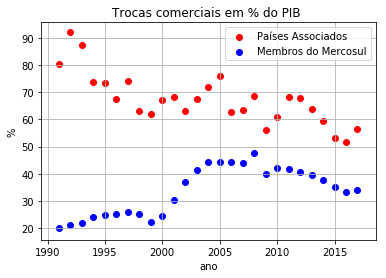

In [41]:
ano = range(1991,2018,1)
plt.scatter(ano, comercio_todos[comercio_todos.Mercosul == 'nao'].mean(), color ='red', label = 'Países Associados')
plt.scatter(ano,comercio_todos[comercio_todos.Mercosul == 'sim'].mean(), color = 'blue', label = 'Membros do Mercosul')
plt.title('Trocas comerciais em % do PIB ')
plt.ylabel('%')
plt.xlabel('ano')
plt.grid(True)
plt.legend()
plt.show()

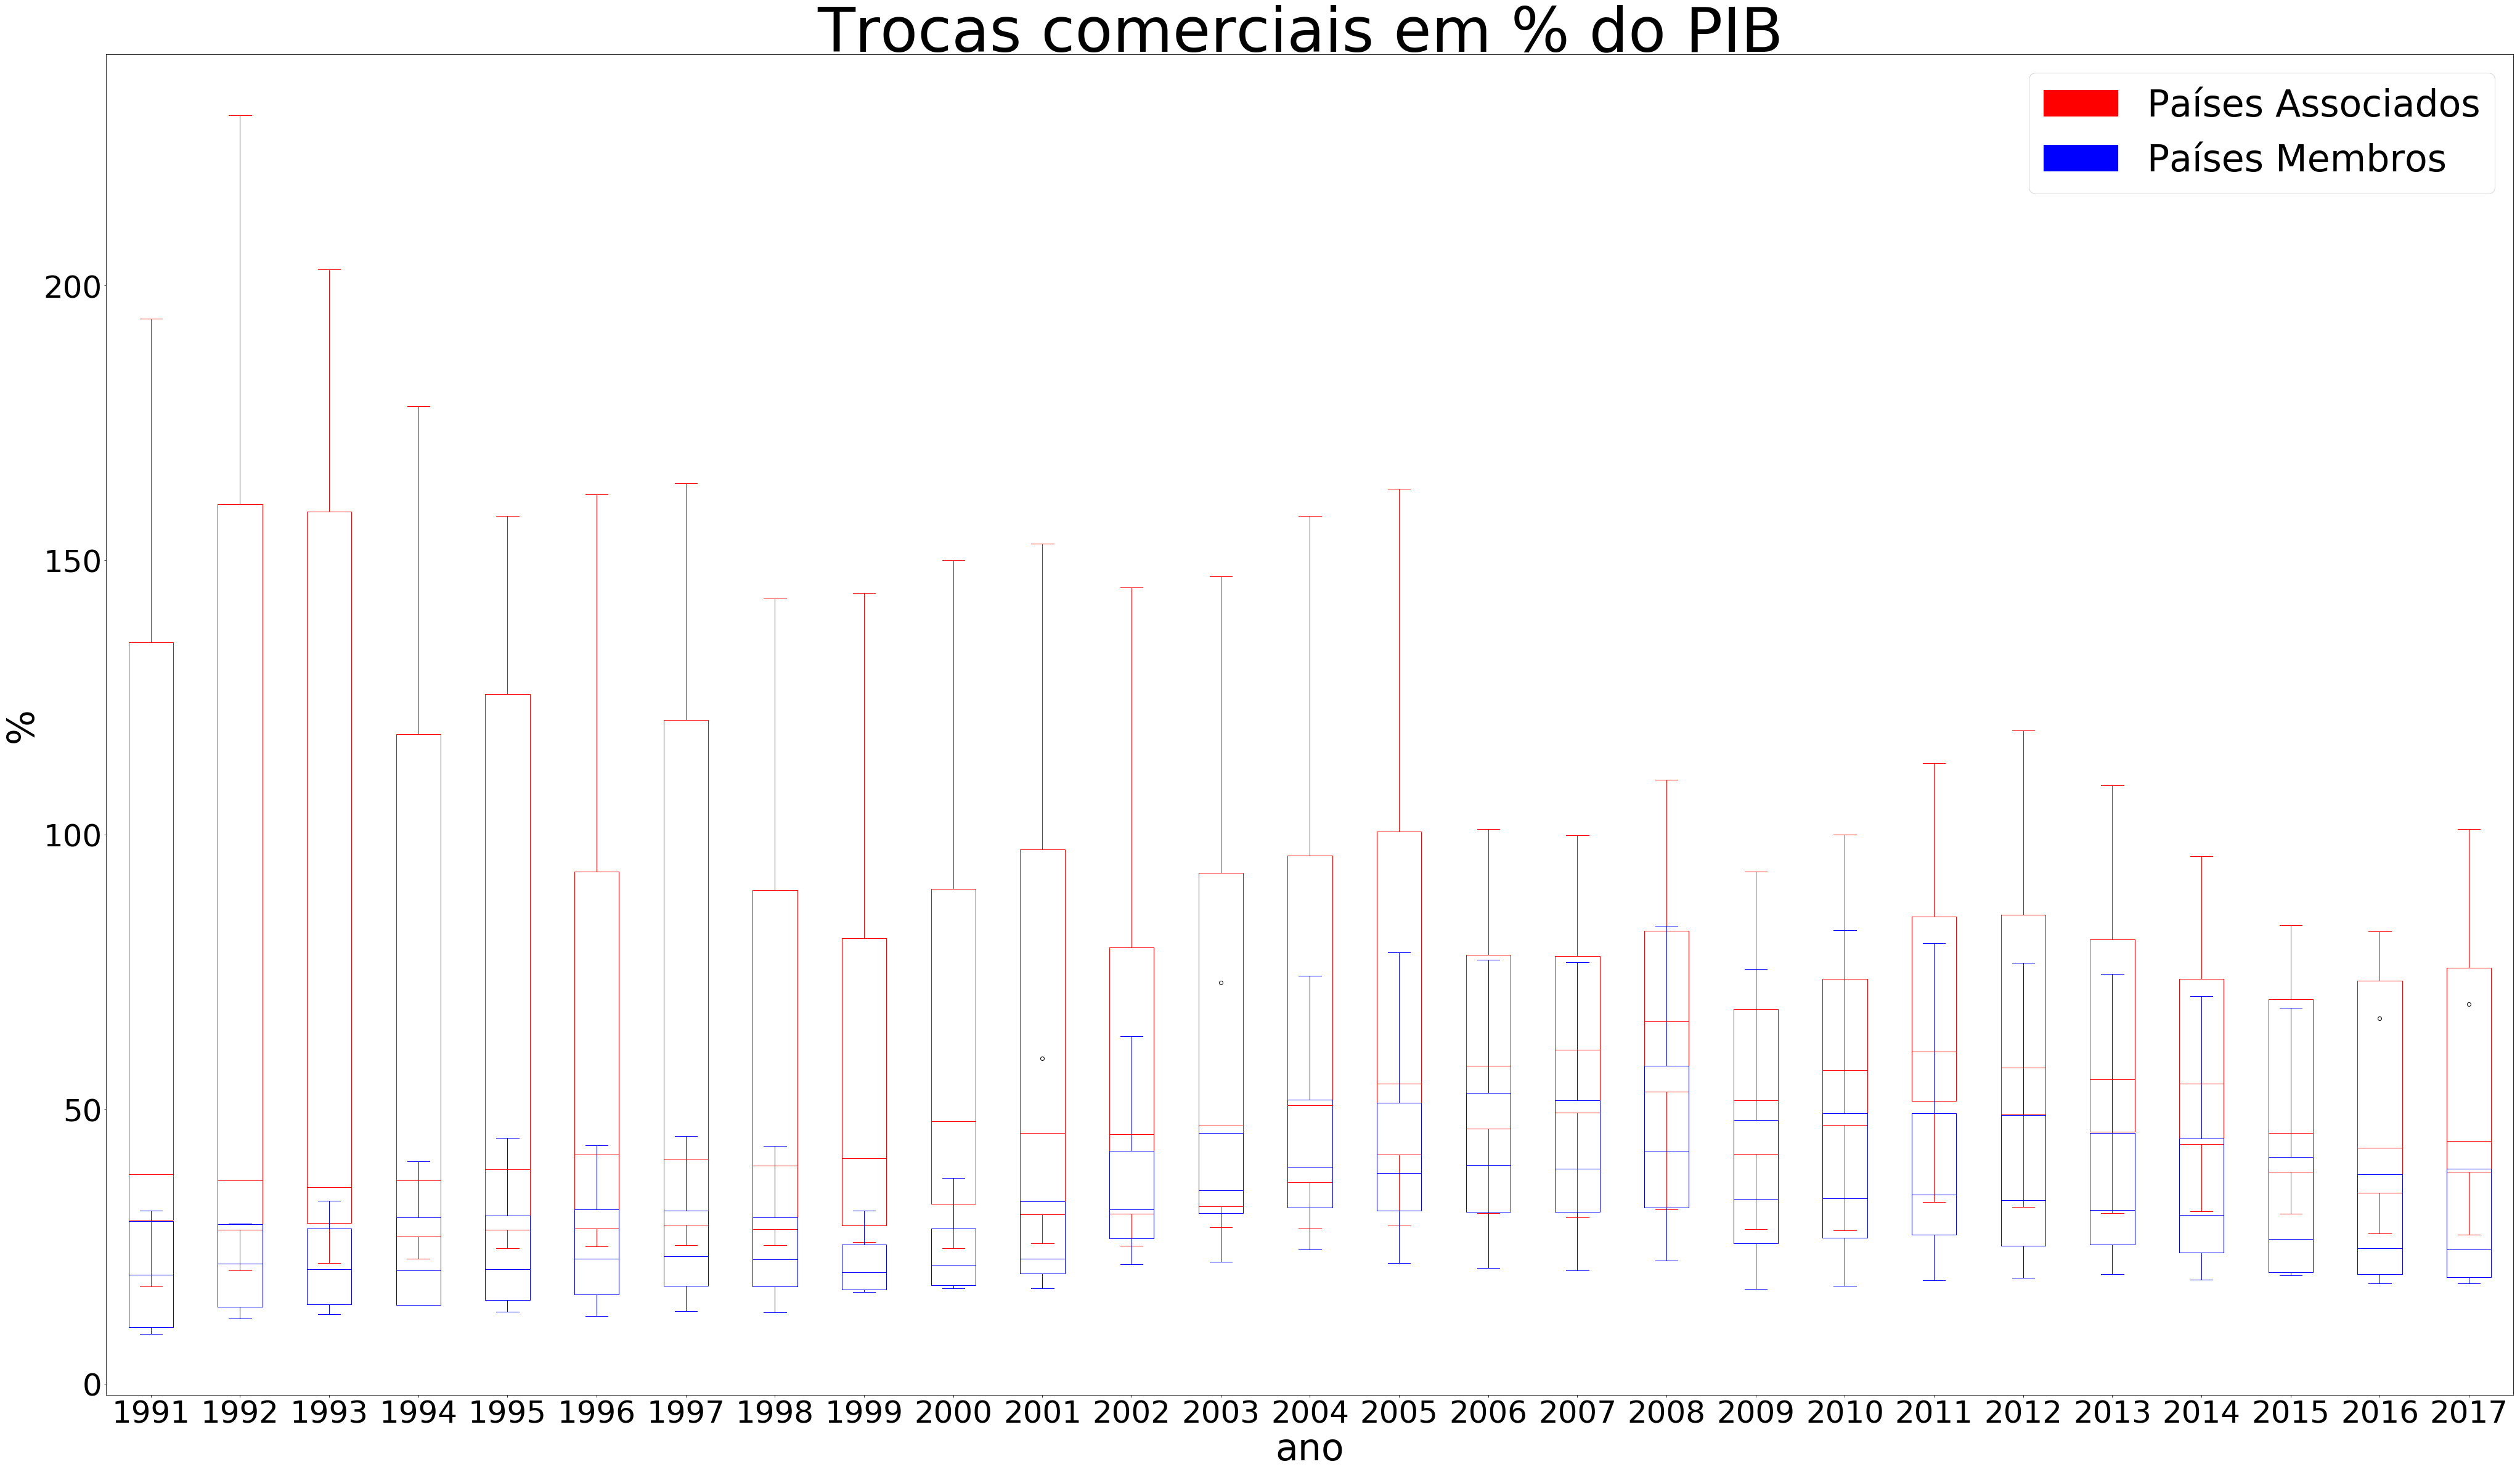

In [31]:
ax = comercio_todos[comercio_todos.Mercosul == 'nao'].plot.box(figsize=(70,40), color="r", label = 'teste') 
comercio_todos[comercio_todos.Mercosul == 'sim'].plot.box(ax=ax,figsize=(70,40),color = 'b',label = 'fodasse')
plt.ylabel('%',size = 60)
plt.title('Trocas comerciais em % do PIB ', size = 100)
plt.xlabel('ano',size = 60)
plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=50)
red_patch = mpatches.Patch(color='red', label='Países Associados')
blue_patch = mpatches.Patch(color='blue', label='Países Membros')
plt.legend(handles=[red_patch, blue_patch],fontsize=(60))
plt.show()

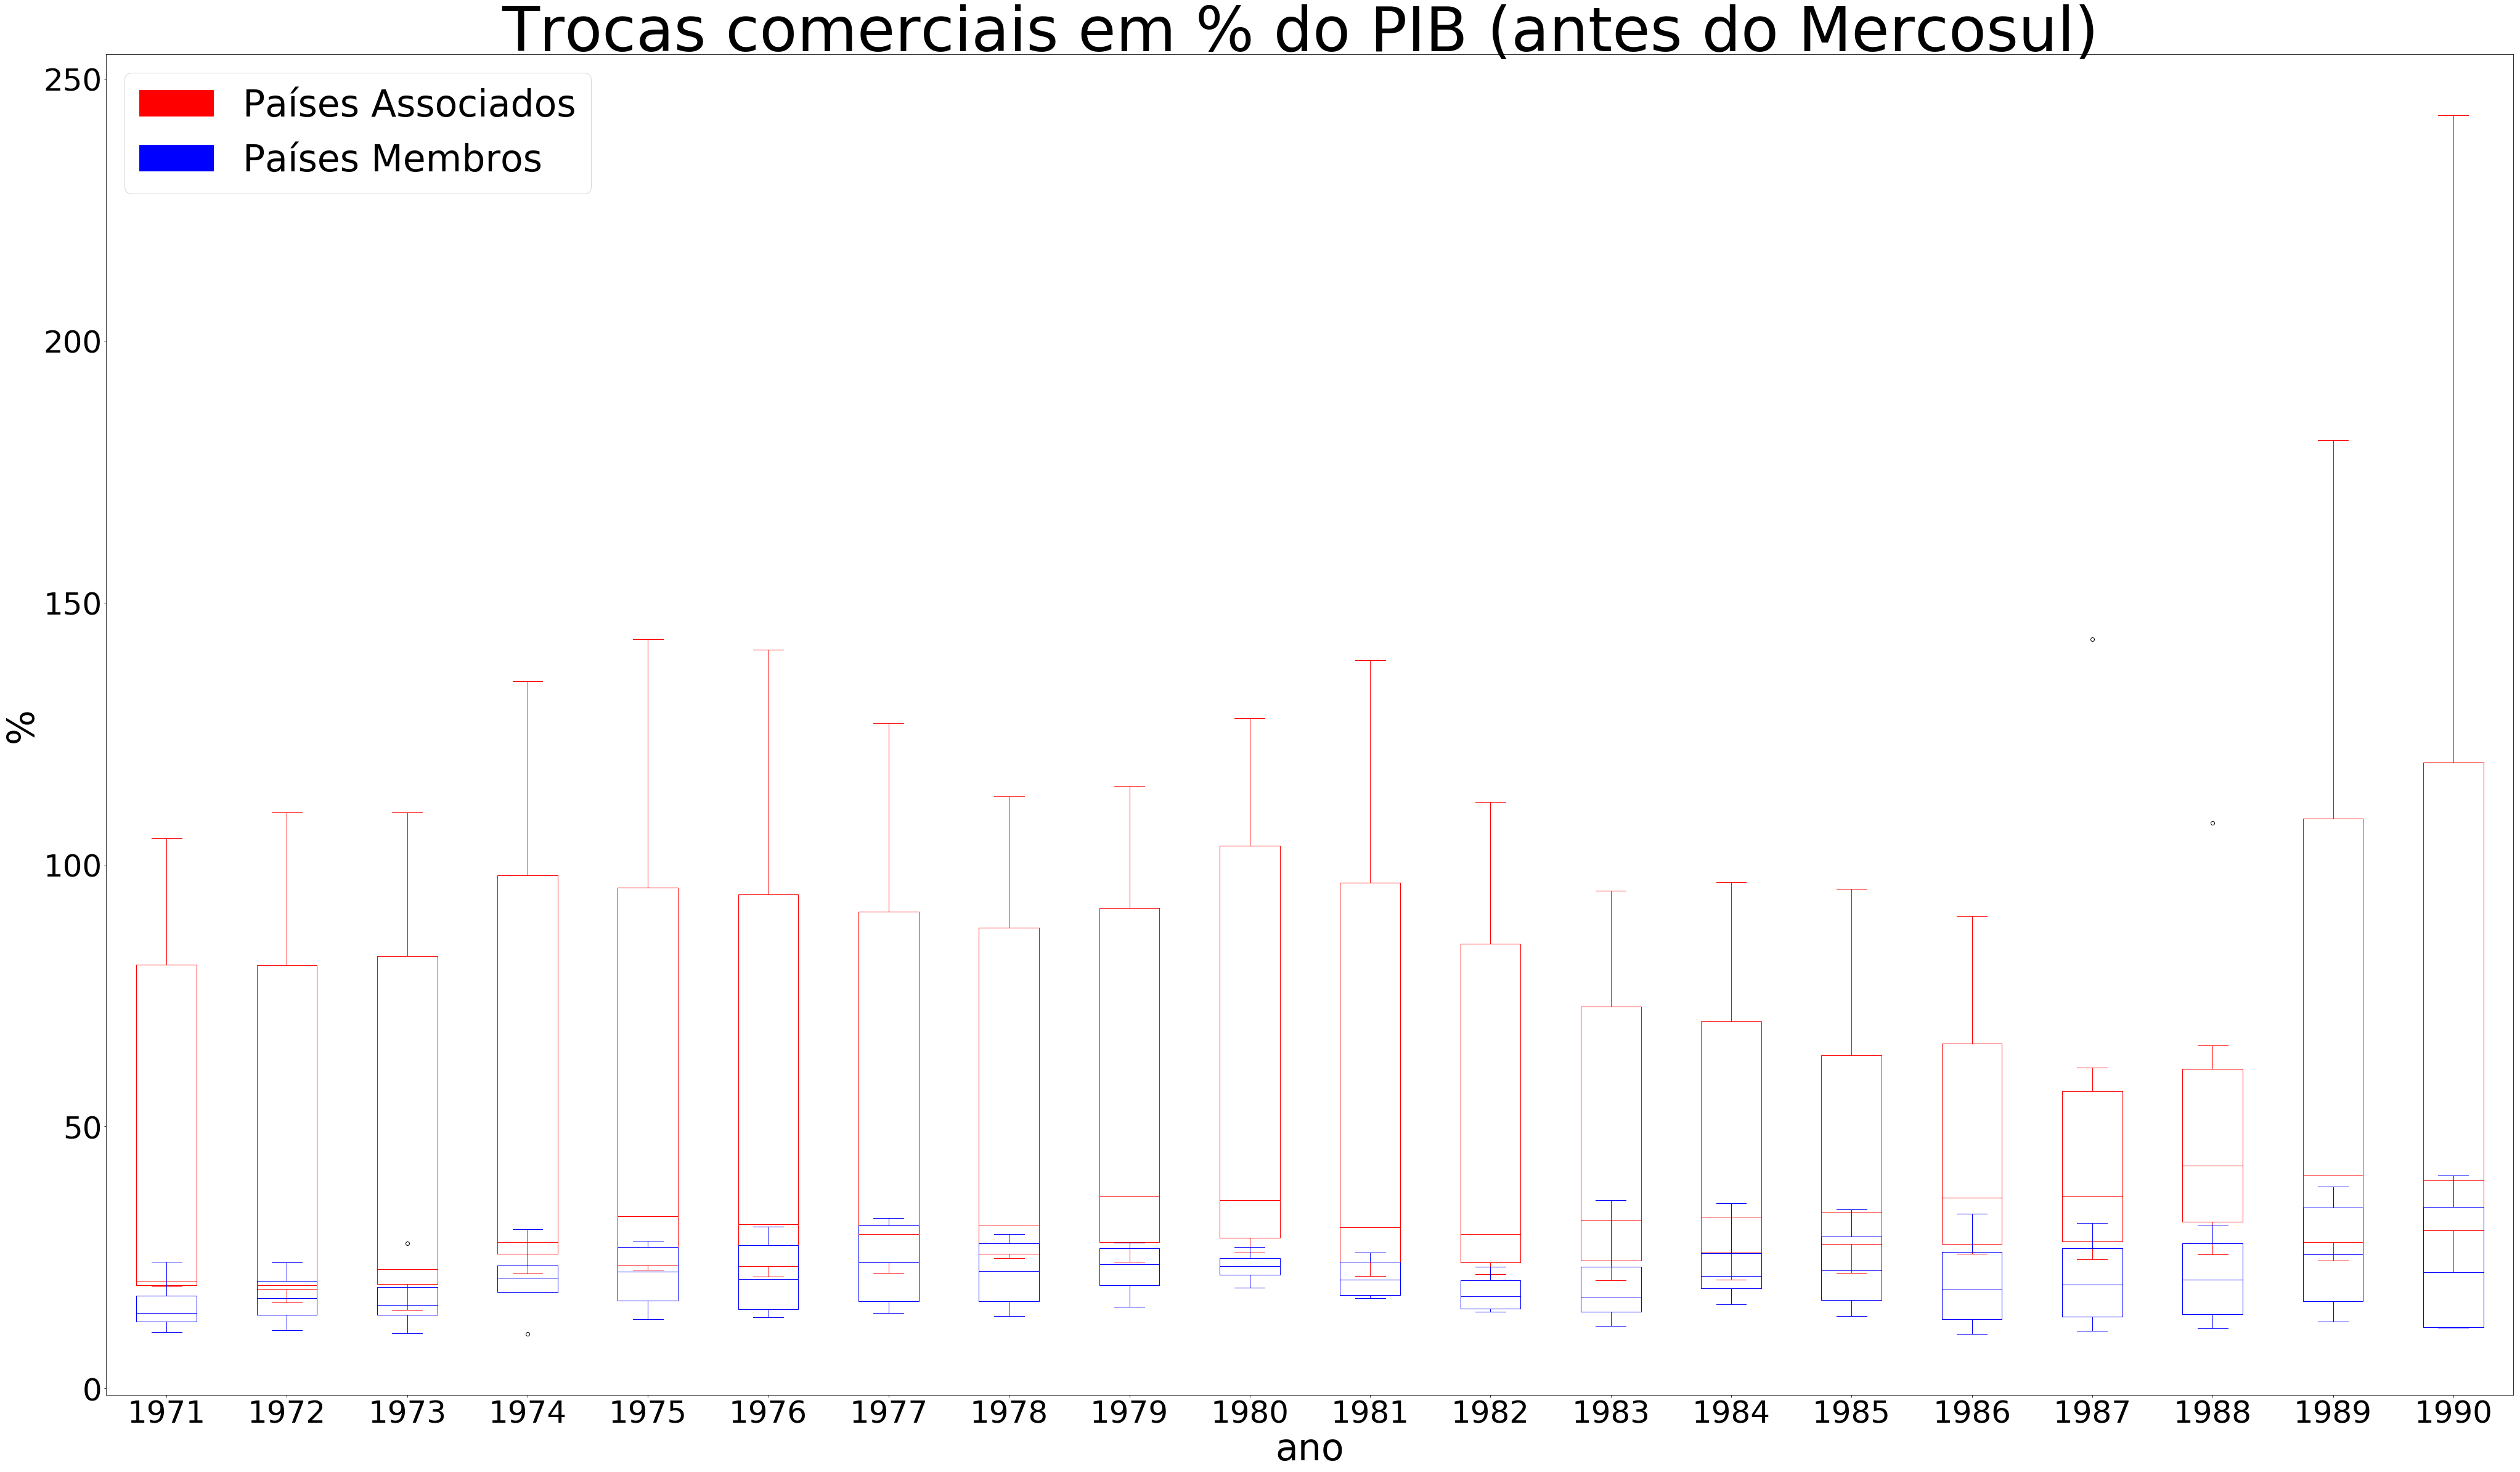

In [32]:
ax = comercio_todos_a[comercio_todos_a.Mercosul == 'nao'].plot.box(figsize=(70,40), color="r", label = 'teste') 
comercio_todos_a[comercio_todos_a.Mercosul == 'sim'].plot.box(ax=ax,figsize=(70,40),color = 'b',label = 'fodasse')
plt.ylabel('%',size = 60)
plt.title('Trocas comerciais em % do PIB (antes do Mercosul) ', size = 100)
plt.xlabel('ano',size = 60)
plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=50)
red_patch = mpatches.Patch(color='red', label='Países Associados')
blue_patch = mpatches.Patch(color='blue', label='Países Membros')
plt.legend(handles=[red_patch, blue_patch],fontsize=(60))
plt.show()

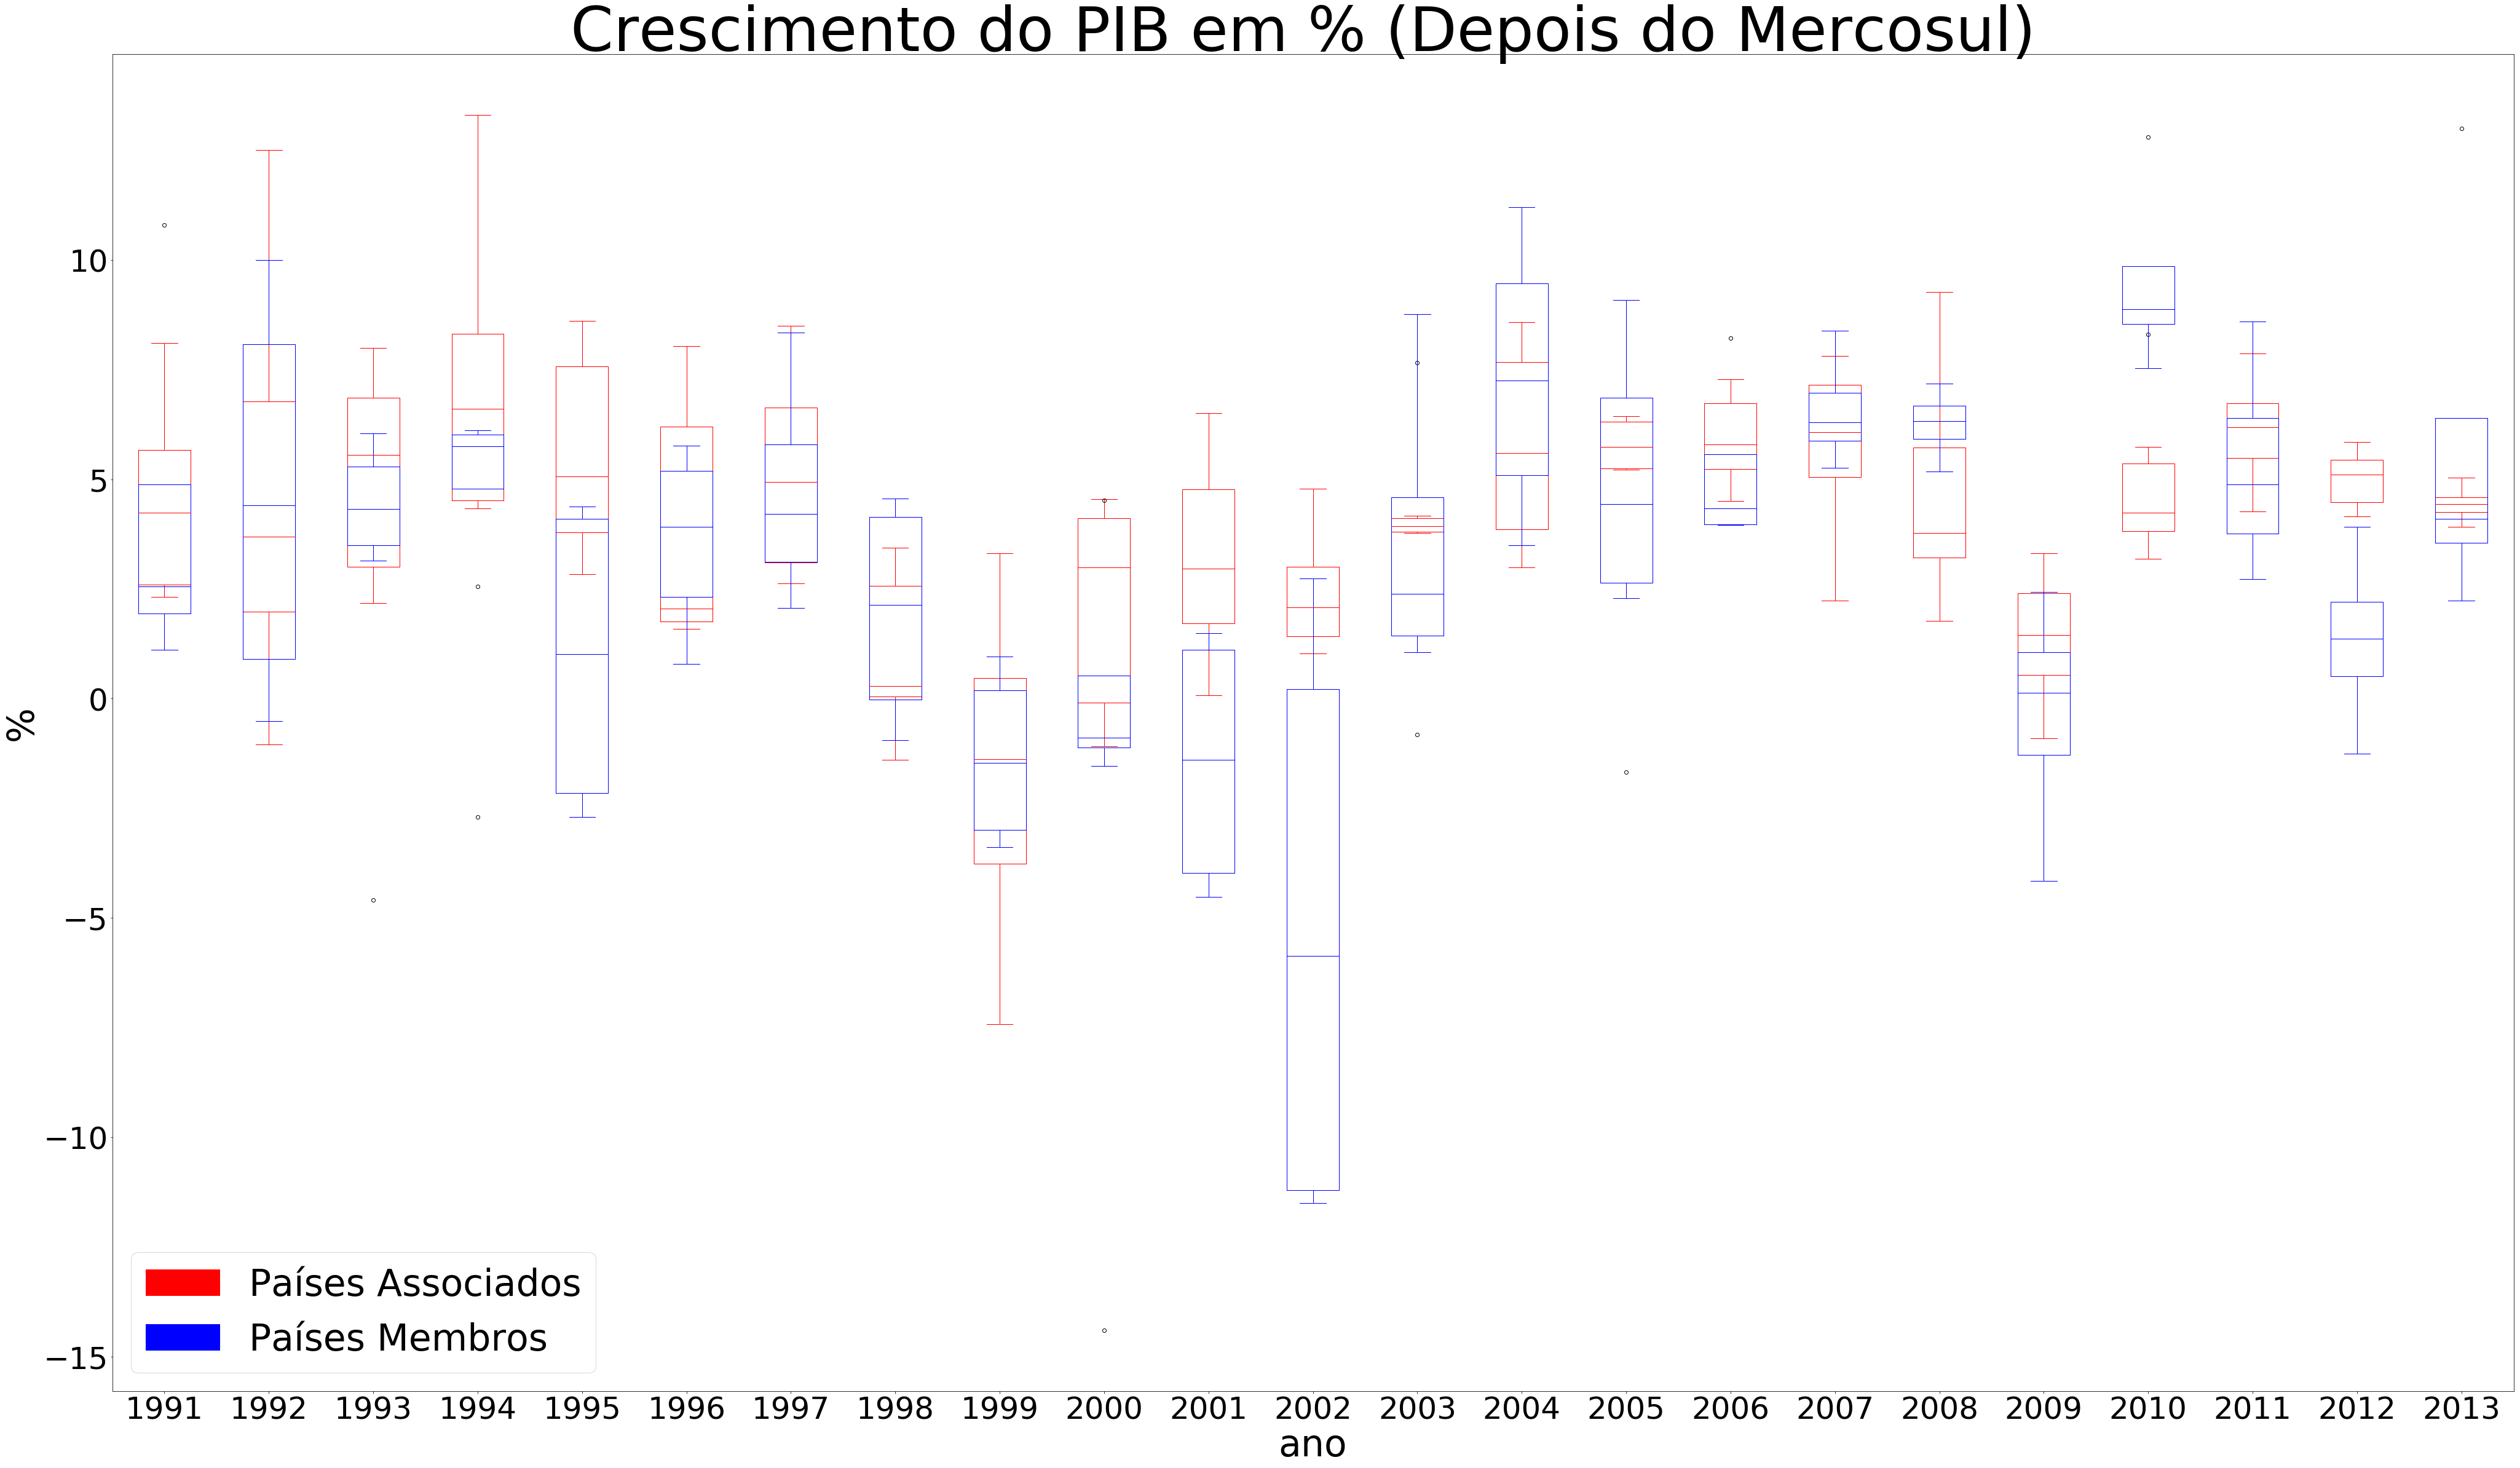

In [33]:
ax = crescimento_todos[crescimento_todos.Mercosul == 'nao'].plot.box(figsize=(70,40), color="r") 
crescimento_todos[crescimento_todos.Mercosul == 'sim'].plot.box(ax=ax,figsize=(70,40),color = 'b')
plt.ylabel('%',size = 60)
plt.title('Crescimento do PIB em % (Depois do Mercosul) ', size = 100)
plt.xlabel('ano',size = 60)
plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=50)
red_patch = mpatches.Patch(color='red', label='Países Associados')
blue_patch = mpatches.Patch(color='blue', label='Países Membros')
plt.legend(handles=[red_patch, blue_patch],fontsize=(60))
plt.show()

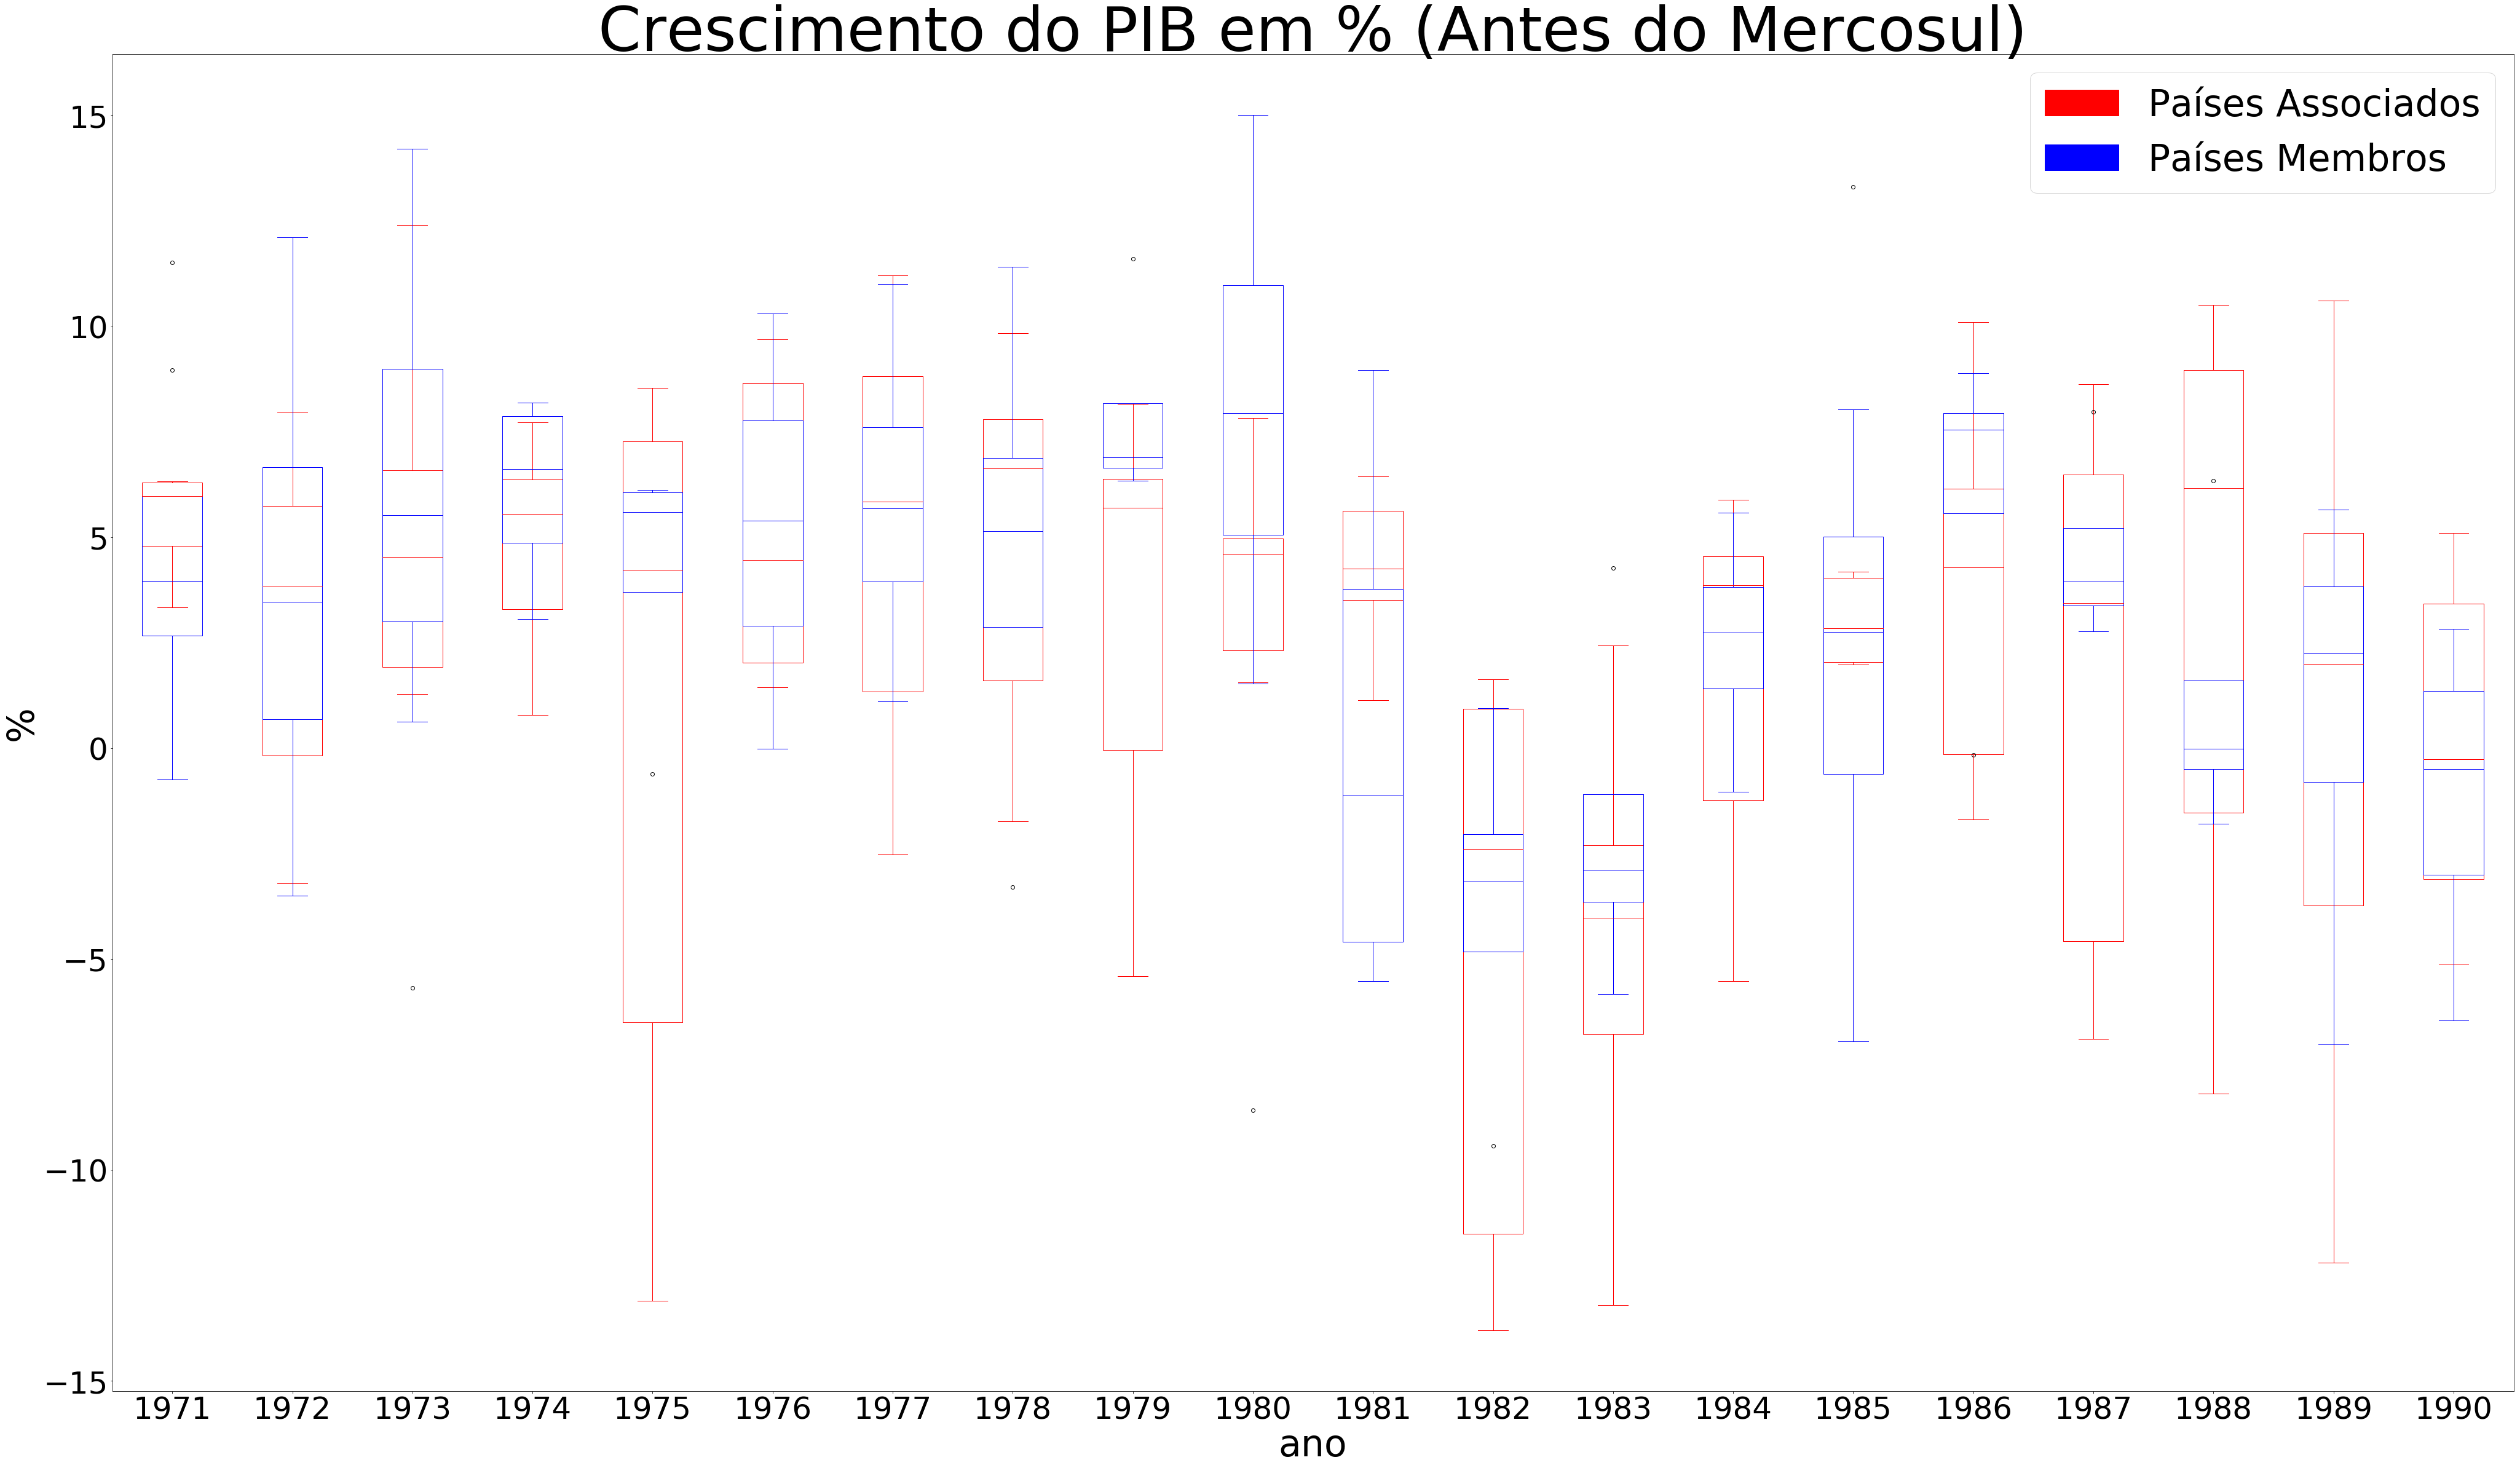

In [34]:
ax = crescimento_todos_a[crescimento_todos_a.Mercosul == 'nao'].plot.box(figsize=(70,40), color="r") 
crescimento_todos_a[crescimento_todos_a.Mercosul == 'sim'].plot.box(ax=ax,figsize=(70,40),color = 'b')
plt.ylabel('%',size = 60)
plt.title('Crescimento do PIB em % (Antes do Mercosul)', size = 100)
plt.xlabel('ano',size = 60)
plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=50)
red_patch = mpatches.Patch(color='red', label='Países Associados')
blue_patch = mpatches.Patch(color='blue', label='Países Membros')
plt.legend(handles=[red_patch, blue_patch],fontsize=(60))
plt.show()

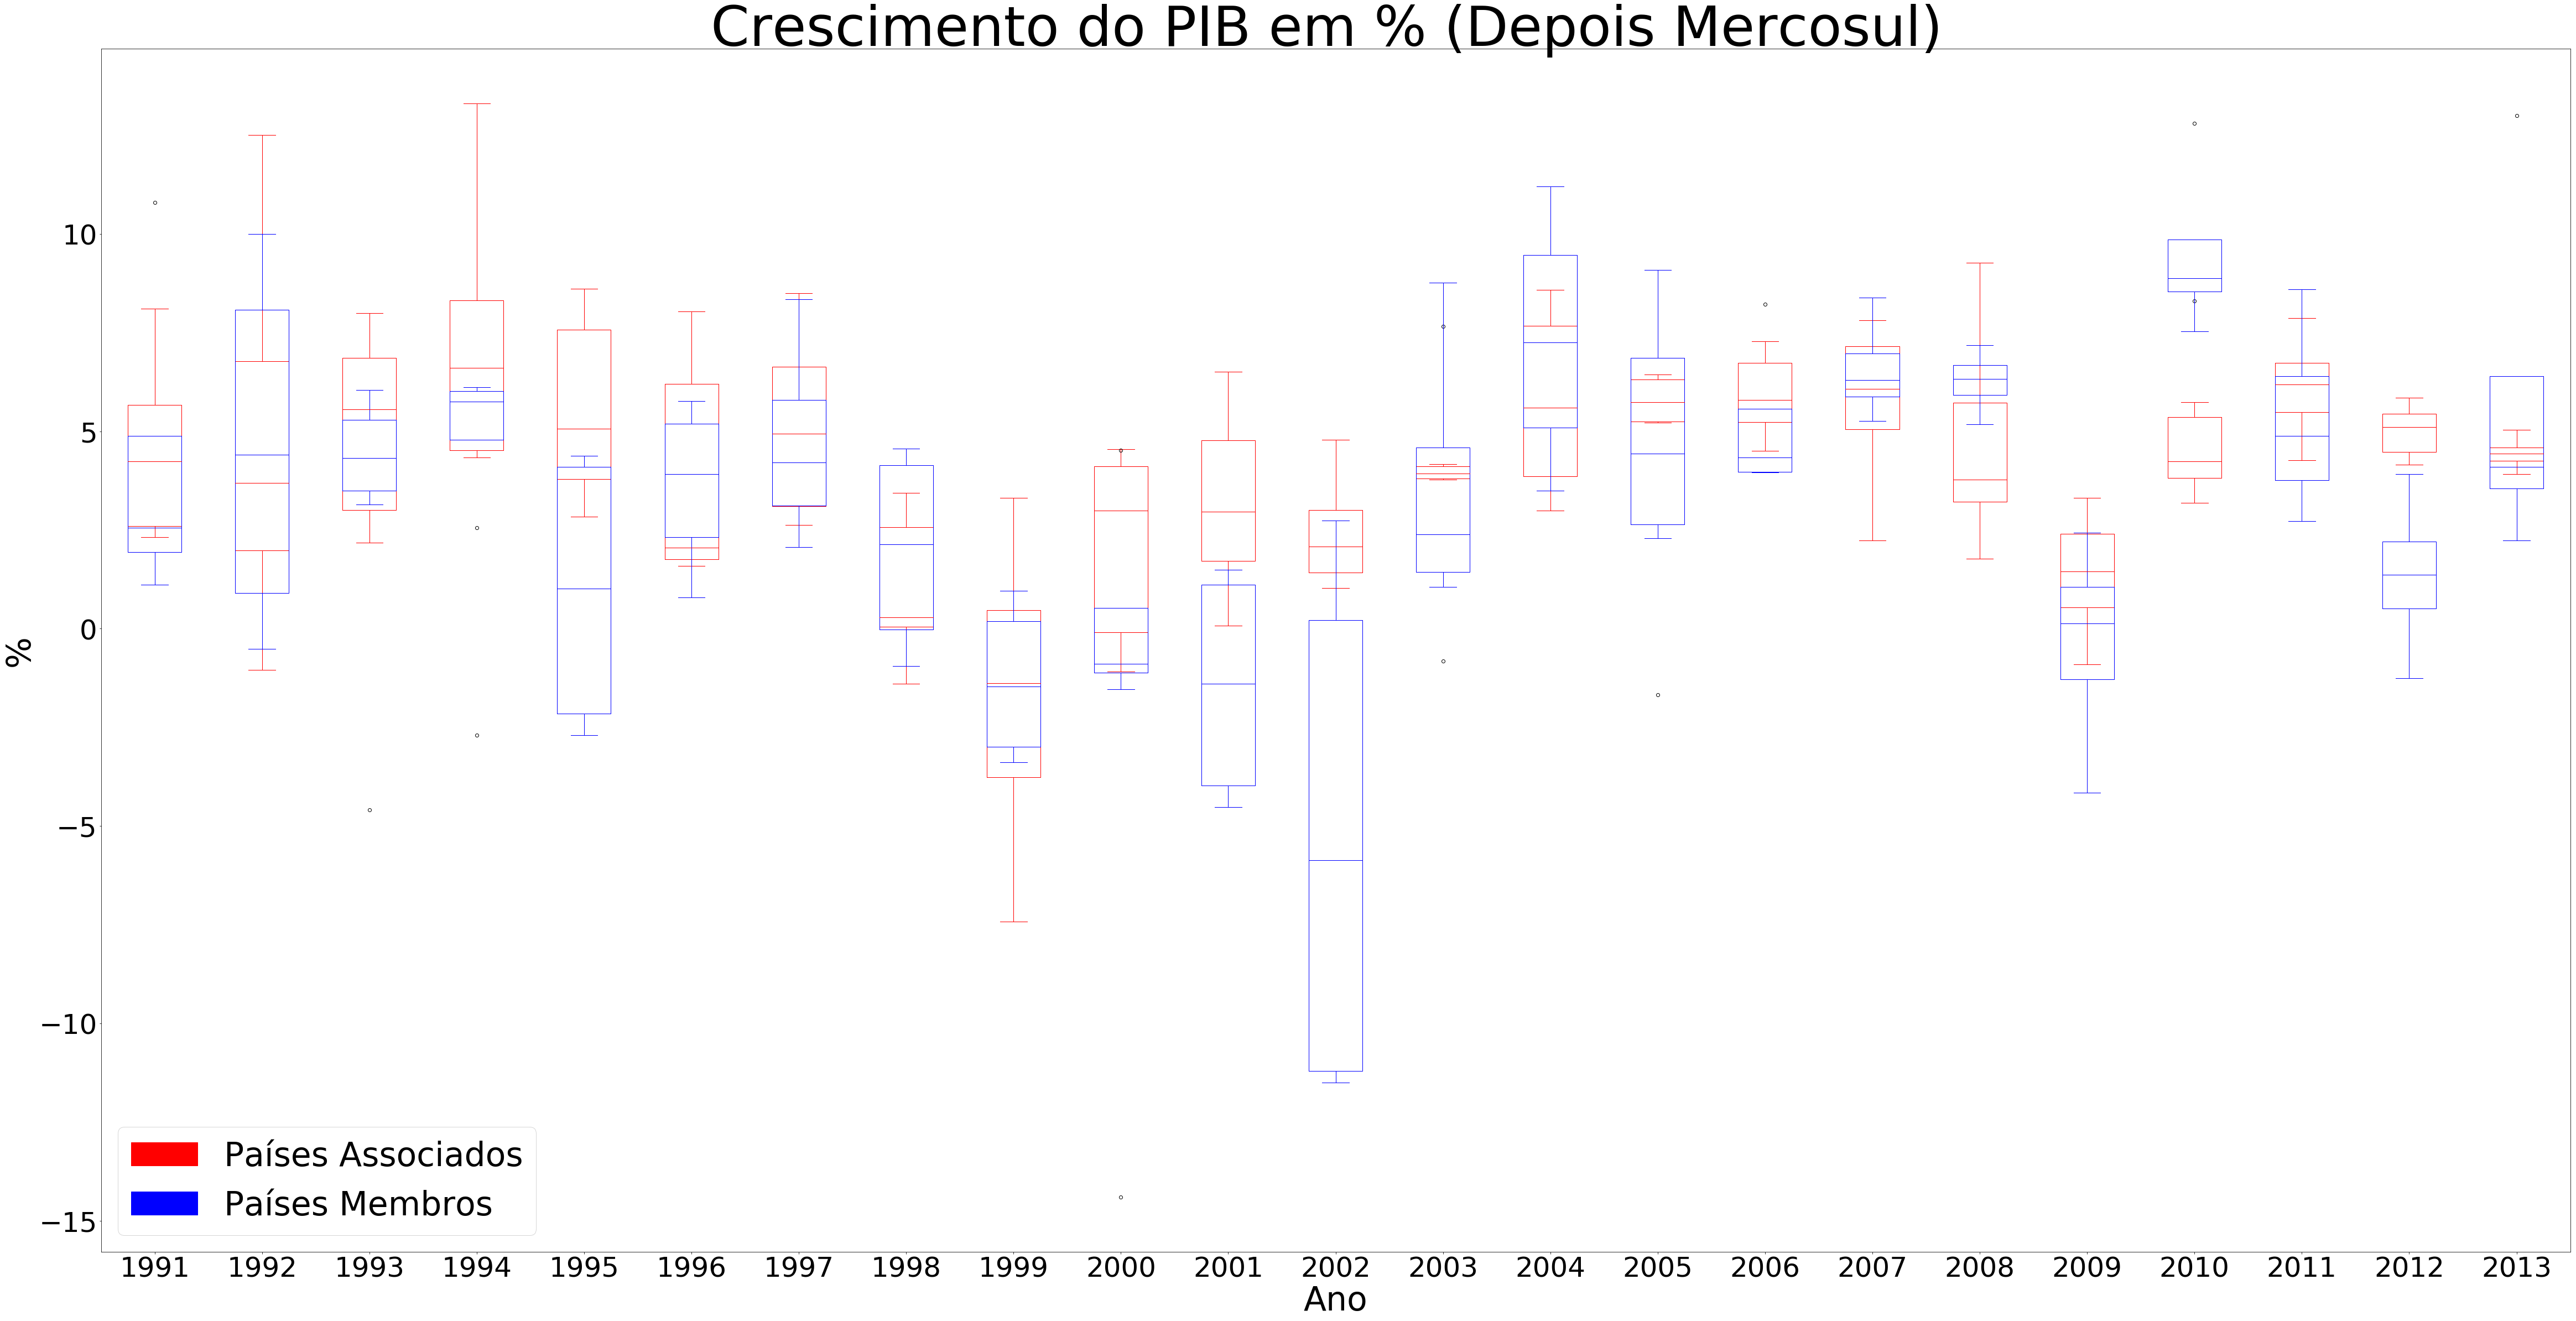

In [35]:
ax = crescimento_todos[crescimento_todos.Mercosul == 'nao'].plot.box(figsize=(80,40), color="r") 
crescimento_todos[crescimento_todos.Mercosul == 'sim'].plot.box(ax=ax,figsize=(80,40),color = 'b')
plt.ylabel('%',size = 60)
plt.title('Crescimento do PIB em % (Depois Mercosul) ', size = 100)
plt.xlabel('Ano',size = 60)
plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=50)
red_patch = mpatches.Patch(color='red', label='Países Associados')
blue_patch = mpatches.Patch(color='blue', label='Países Membros')
plt.legend(handles=[red_patch, blue_patch],fontsize=(60))
plt.show()

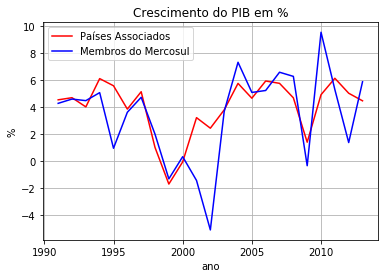

In [36]:
ano2 = range(1991,2014,1)
plt.title('Crescimento do PIB em %')
plt.ylabel('%')
plt.xlabel('ano')
plt.plot(ano2,crescimento_associados.mean(), c = 'r', label = 'Países Associados')
plt.plot(ano2, crescimento_mercosul.mean(), c = 'b', label = 'Membros do Mercosul')
plt.legend()
plt.grid(True)
plt.show()

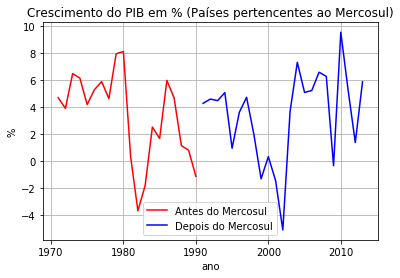

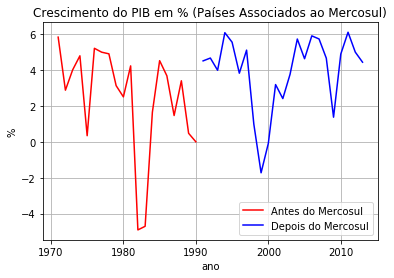

In [37]:
plt.plot(crescimento_mercosul_a.mean(),c = 'r', label = 'Antes do Mercosul')
plt.plot(crescimento_mercosul.mean(),c = 'b', label = 'Depois do Mercosul')
plt.title('Crescimento do PIB em % (Países pertencentes ao Mercosul)')
plt.ylabel('%')
plt.xlabel('ano')
plt.legend()
plt.grid(True)
plt.show()
plt.plot(crescimento_associados_a.mean(),c = 'r', label = 'Antes do Mercosul')
plt.plot(crescimento_associados.mean(),c = 'b', label = 'Depois do Mercosul')
plt.title('Crescimento do PIB em % (Países Associados ao Mercosul)')
plt.ylabel('%')
plt.xlabel('ano')
plt.legend()
plt.grid(True)
plt.show()

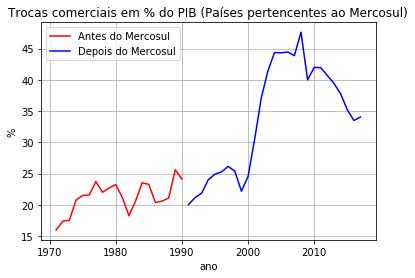

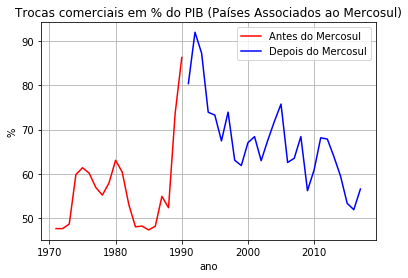

In [38]:
plt.title('Trocas comerciais em % do PIB (Países pertencentes ao Mercosul)')
plt.ylabel('%')
plt.xlabel('ano')
x = plt.plot(comercio_mercosul_a.mean(),c = 'r', label = 'Antes do Mercosul')
plt.plot( comercio_mercosul.mean(),c = 'b', label = 'Depois do Mercosul')
plt.legend()
plt.grid(True)
plt.show()
plt.title('Trocas comerciais em % do PIB (Países Associados ao Mercosul)')
plt.ylabel('%')
plt.xlabel('ano')
plt.plot(comercio_associados_a.mean(),c = 'r', label = 'Antes do Mercosul')
plt.plot(comercio_associados.mean(),c = 'b', label = 'Depois do Mercosul')
plt.legend()
plt.grid(True)

In [42]:
x = crescimento_mercosul.drop('Mercosul', axis=1).transpose()
b = x.Brazil.corr(x.Argentina)
y = crescimento_mercosul_a.drop('Mercosul', axis=1).transpose()
a = y.Brazil.corr(y.Argentina)
print('Correlação entre crescimento do PIB dos Países com maiores PIB do Mercosul(de 1991 pra ca)',b)
print('Correlação entre crescimento do PIB dos Países com maiores PIB do Mercosul(de 1971 até 1990)',a)

Correlação entre crescimento do PIB dos Países com maiores PIB do Mercosul(de 1991 pra ca) 0.21301265947759493
Correlação entre crescimento do PIB dos Países com maiores PIB do Mercosul(de 1971 até 1990) 0.3734729065710396


In [44]:
x = crescimento_associados.drop('Mercosul', axis=1).transpose()
b = x.Chile.corr(x.Colombia)
y = crescimento_associados_a.drop('Mercosul', axis=1).transpose()
a = y.Chile.corr(y.Colombia)
print('Correlação entre crescimento do PIB dos Países com maiores PIB dos países Associados(de 1991 pra ca)',b)
print('Correlação entre crescimento do PIB dos Países com maiores PIB dos países Associados(de 1971 até 1990)',a)

Correlação entre crescimento do PIB dos Países com maiores PIB dos países Associados(de 1991 pra ca) 0.550507438488063
Correlação entre crescimento do PIB dos Países com maiores PIB dos países Associados(de 1971 até 1990) 0.390043840883175


## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados